In [3]:
# Add relevant Jupyter notebook extensions 

from control import Controller
from dynamic import Submarine, ClosedLoop, Mission
from terrain import generate_reference_and_limits

In [6]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs', '', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-packages', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-packages\\win32', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-pack

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [11]:
# Import relevant modules
# Define the gains for the controller
gains = {'Kp': 0.15, 'Ki': 0.0, 'Kd': 0.6}

# Instantiate the controller and submarine
controller = Controller(gains)
sub = Submarine()

# Load the mission from the mission.csv file
mission = Mission.from_csv('mission.csv')

# Instantiate your controller (dependi
# ng on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

NameError: name 'Submarine' is not defined

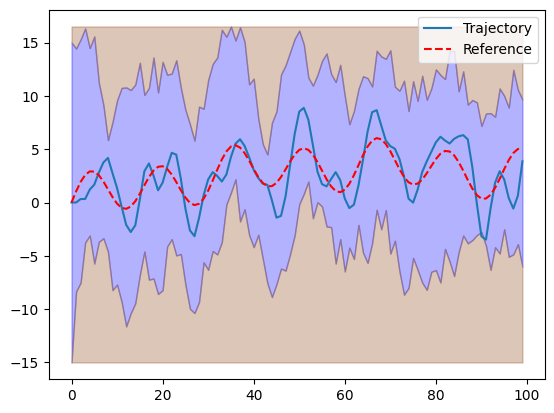

In [24]:
# Define the gains for the controller
gains = {'Kp': 0.2, 'Ki': 0.0, 'Kd': 0.6}

# Instantiate the controller and submarine
controller = Controller(gains)
submarine = Submarine()

# Generate a random mission or load from CSV
# Option 1: Load the mission from the mission.csv file (if already saved)
# mission = Mission.from_csv('mission.csv')

# Option 2: Generate a new random mission (if you haven't saved one yet)
duration = 100  # You can change this based on your simulation needs
scale = 5.0     # Scaling factor for the mission
mission = Mission.random_mission(duration, scale)

# Instantiate the closed loop system
closed_loop = ClosedLoop(submarine, controller)

# Simulate the system with random disturbances
variance = 0.5  # You can adjust the variance to see how it affects the disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance)

# Plot the completed mission including the reference trajectory and submarine trajectory
trajectory.plot_completed_mission(mission)
